In [1]:
#DATASET DE ENTRADA
pastaTrab = 'D:\\TCC\Meu TCC\\Dados\\3 - Dados Tratados'

In [2]:
#IMPORTA BIBLIOTECAS
import pandas as pd
import warnings
import numpy as np
import statsmodels as sm
from scipy import stats
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
matplotlib.style.use('ggplot')
pd.set_option('max_rows', None)
warnings.filterwarnings("ignore")

In [3]:
#RECUPERA OS DADOS TRATADOS
df_dadosTratados=pd.read_csv(pastaTrab + '\\06_dadosTratados.csv', skiprows = 2, index_col=[0,1])
df_dadosTratados.rename(columns = {'Unnamed: 2': 'Tax_%_GDP', 'Unnamed: 3': 'GINI_Index', 
                                    'Unnamed: 4': 'Social_benefits_expense_%_GDP', 'Unnamed: 5': 'Interest_expense_%_GDP',
                                    'Unnamed: 6': 'OilRrents_%_GDP', 'Unnamed: 7': 'Agriculture_%_GDP',
                                    'Unnamed: 8': 'ControlofCorruption', 'Unnamed: 9': 'GovernmentEffectiveness',
                                    'Unnamed: 10': 'RegulatoryQuality', 'Unnamed: 11': 'RuleofLaw', 
                                    'Unnamed: 12': 'Political_StabilityNoViolence', 'Unnamed: 13': 'VoiceandAccountability'},
                       inplace=True)

# Análise da variável dependente

In [4]:
#RESUMO ESTATÍSTICO DA VARIÁVEL DEPENDENTE
df_dadosTratados['Tax_%_GDP'].describe().round(2)

count    1794.00
mean       24.28
std        12.78
min         0.03
25%        14.61
50%        26.20
75%        33.97
max        50.29
Name: Tax_%_GDP, dtype: float64

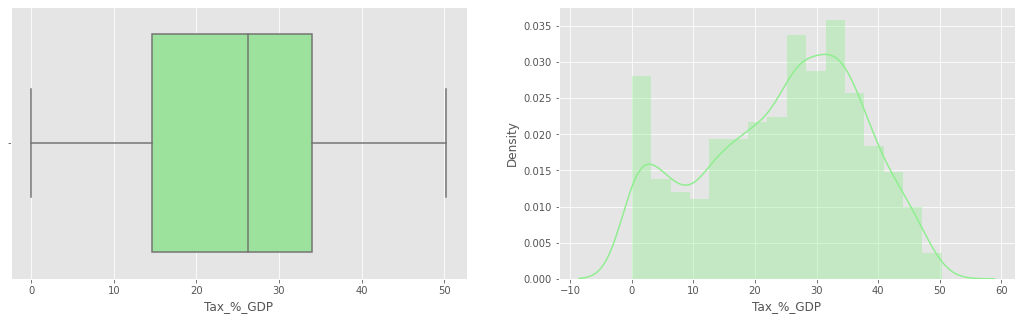

In [5]:
#BOXPLOT E HISTOGRAMA DA VARIÁVEL DEPENDENTE
fig, axs = plt.subplots(ncols=2, figsize=(18,5), sharey=False);
sns.boxplot(df_dadosTratados['Tax_%_GDP'], ax=axs[0], color='lightgreen');
sns.distplot(df_dadosTratados['Tax_%_GDP'], ax=axs[1], color='lightgreen');

 # Análise das variáveis dependentes

<AxesSubplot:ylabel='Density'>

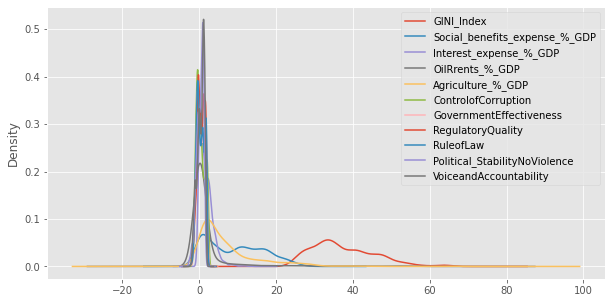

In [6]:
#DISTRIBUIÇÃO DAS VARIÁVEIS INDEPENDENTES
df_independente = df_dadosTratados.drop(columns = ['Tax_%_GDP'], axis = 1)
df_independente.plot(kind='kde', figsize=(10,5))

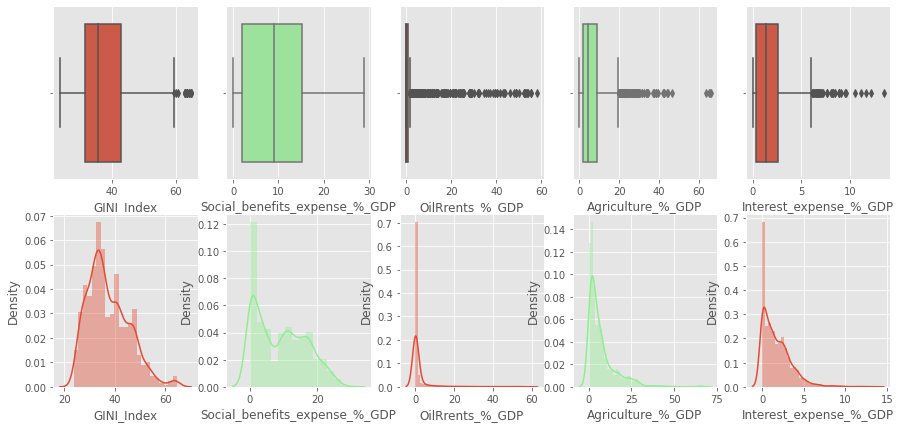

In [7]:
#BOXPLOT E HISTOGRAMA DAS VARIÁVEIS INDEPENDENTE - PARTE 1
fig, axs = plt.subplots(2,5, figsize=(15,7), sharey=False);
sns.boxplot(df_dadosTratados['GINI_Index'], ax=axs[0,0]);
sns.boxplot(df_dadosTratados['Social_benefits_expense_%_GDP'], ax=axs[0,1], color='lightgreen');
sns.boxplot(df_dadosTratados['OilRrents_%_GDP'], ax=axs[0,2]);
sns.boxplot(df_dadosTratados['Agriculture_%_GDP'], ax=axs[0,3], color='lightgreen');
sns.boxplot(df_dadosTratados['Interest_expense_%_GDP'], ax=axs[0,4]);
sns.distplot(df_dadosTratados['GINI_Index'], ax=axs[1,0]);
sns.distplot(df_dadosTratados['Social_benefits_expense_%_GDP'], ax=axs[1,1], color='lightgreen');
sns.distplot(df_dadosTratados['OilRrents_%_GDP'], ax=axs[1,2]);
sns.distplot(df_dadosTratados['Agriculture_%_GDP'], ax=axs[1,3], color='lightgreen');
sns.distplot(df_dadosTratados['Interest_expense_%_GDP'], ax=axs[1,4]);

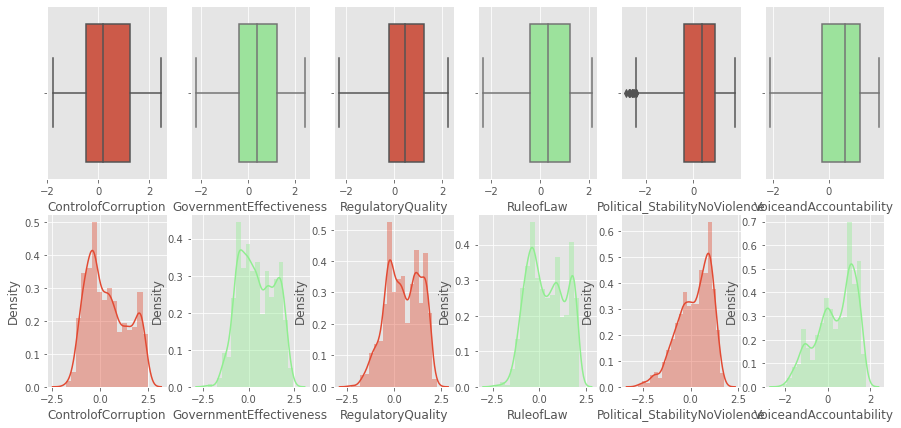

In [8]:
#BOXPLOT E HISTOGRAMA DAS VARIÁVEIS INDEPENDENTE - PARTE 2
fig, axs = plt.subplots(2,6, figsize=(15,7), sharey=False);
sns.boxplot(df_dadosTratados['ControlofCorruption'], ax=axs[0,0]);
sns.boxplot(df_dadosTratados['GovernmentEffectiveness'], ax=axs[0,1], color='lightgreen');
sns.boxplot(df_dadosTratados['RegulatoryQuality'], ax=axs[0,2]);
sns.boxplot(df_dadosTratados['RuleofLaw'], ax=axs[0,3], color='lightgreen');
sns.boxplot(df_dadosTratados['Political_StabilityNoViolence'], ax=axs[0,4]);
sns.boxplot(df_dadosTratados['VoiceandAccountability'], ax=axs[0,5], color='lightgreen');
sns.distplot(df_dadosTratados['ControlofCorruption'], ax=axs[1,0]);
sns.distplot(df_dadosTratados['GovernmentEffectiveness'], ax=axs[1,1], color='lightgreen');
sns.distplot(df_dadosTratados['RegulatoryQuality'], ax=axs[1,2]);
sns.distplot(df_dadosTratados['RuleofLaw'], ax=axs[1,3], color='lightgreen');
sns.distplot(df_dadosTratados['Political_StabilityNoViolence'], ax=axs[1,4]);
sns.distplot(df_dadosTratados['VoiceandAccountability'], ax=axs[1,5], color='lightgreen');

# Análise das correlações

<AxesSubplot:>

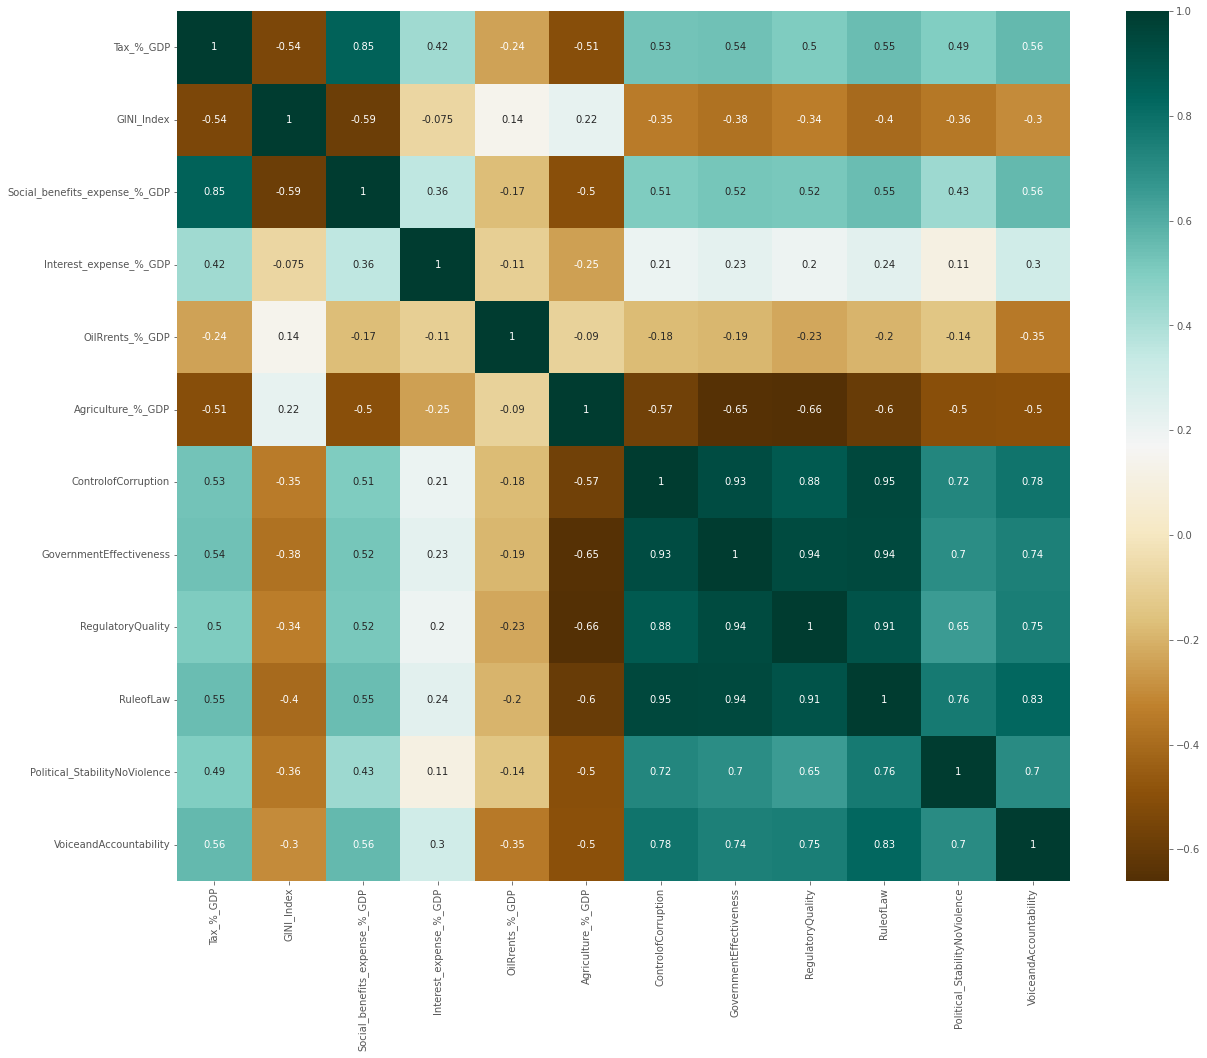

In [9]:
#MATRIZ DE CORRELAÇÃO
plt.figure(figsize=(20,16))
sns.heatmap(df_dadosTratados.corr(),cmap='BrBG',annot=True)

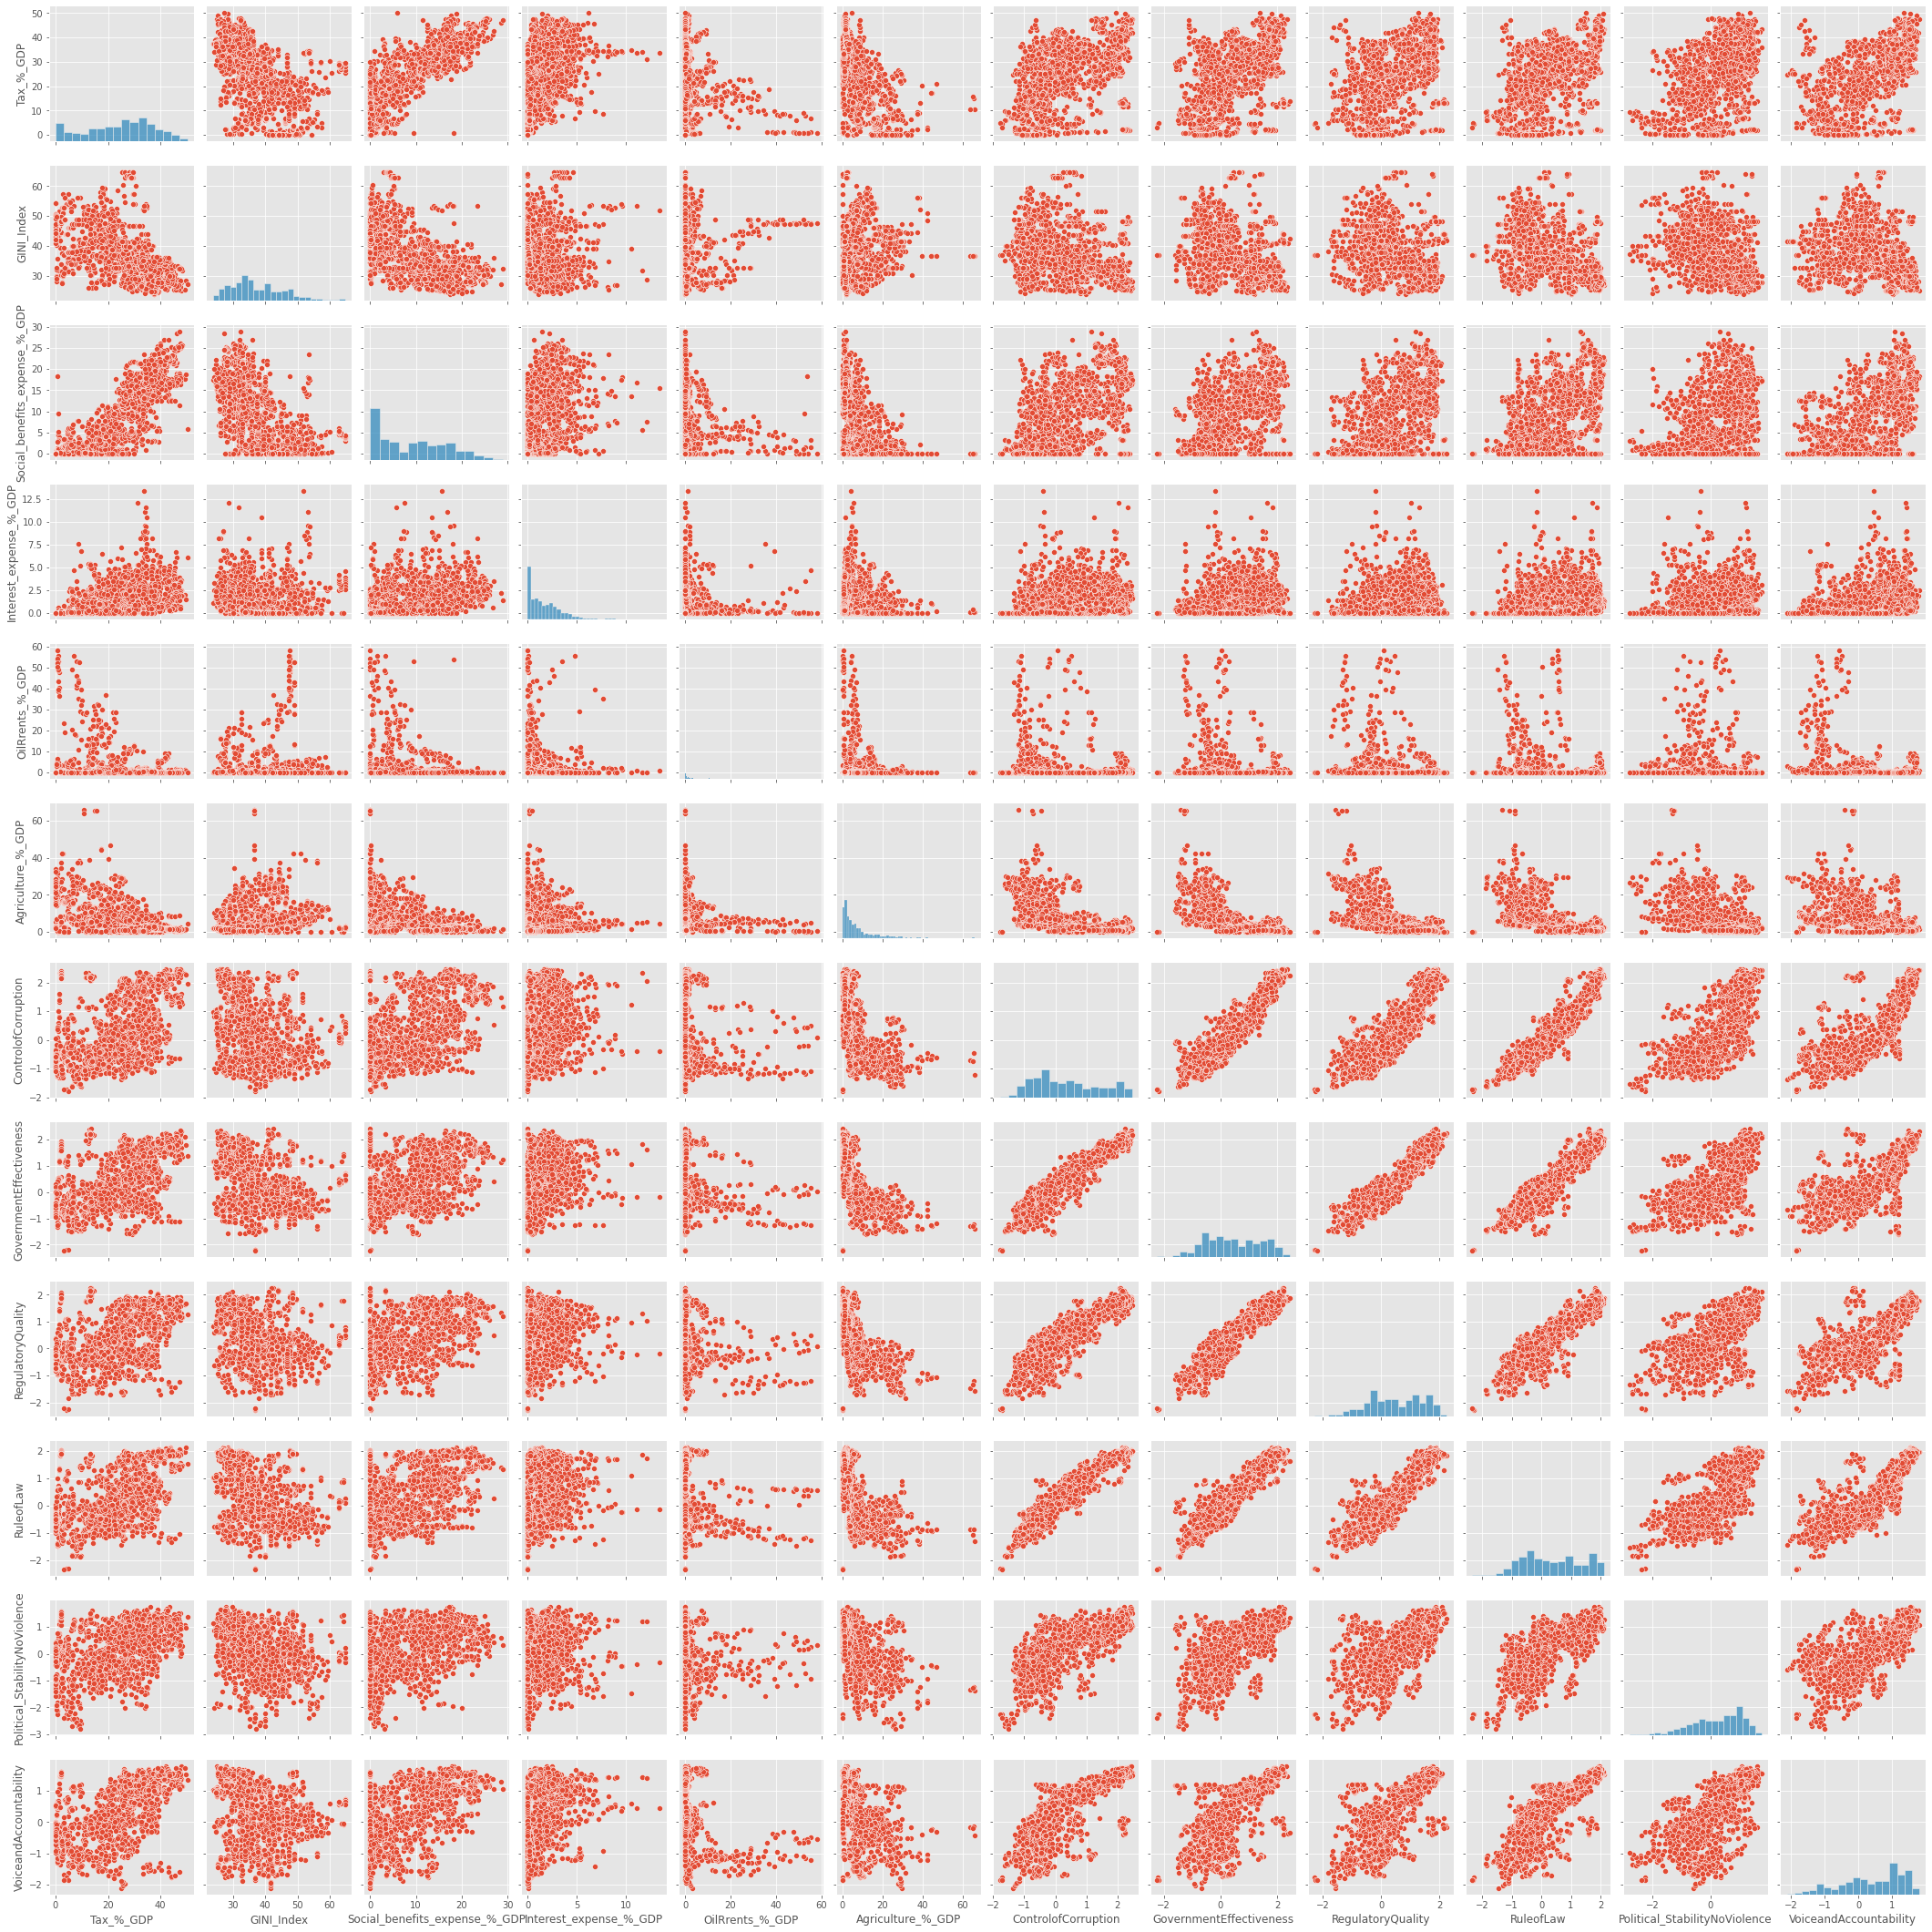

In [10]:
#ANÁLISE VISUAL DAS CORRELAÇÕES
sns.pairplot(df_dadosTratados) 
plt.show()

# Análise de importância das variáveis

In [11]:
y_data = df_dadosTratados['Tax_%_GDP']
X_data = df_dadosTratados.drop(columns = ['Tax_%_GDP'], axis = 1)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_data, y_data, test_size = 0.2, random_state = 123)

In [12]:
labels = ['GINI_Index', 'Social_benefits_expense_%_GDP', 'Interest_expense_%_GDP', 'OilRrents_%_GDP',
          'Agriculture_%_GDP', 'ControlofCorruption', 'GovernmentEffectiveness', 'RegulatoryQuality',
          'RuleofLaw', 'Political_StabilityNoViolence', 'VoiceandAccountability']

In [13]:
rf = RandomForestRegressor(random_state = 123)

In [14]:
rf.fit(X_treinamento, y_treinamento)

RandomForestRegressor(random_state=123)

In [15]:
# Imprime o nome do atributo associado à importância usando índice de Gini
for feature in zip(labels, rf.feature_importances_):
    print(feature)

('GINI_Index', 0.02543315666678315)
('Social_benefits_expense_%_GDP', 0.7118993081966353)
('Interest_expense_%_GDP', 0.09100516145437065)
('OilRrents_%_GDP', 0.013649779220895395)
('Agriculture_%_GDP', 0.03514323152774992)
('ControlofCorruption', 0.02941261665333247)
('GovernmentEffectiveness', 0.009996506429158428)
('RegulatoryQuality', 0.016935443345909337)
('RuleofLaw', 0.015205574130415806)
('Political_StabilityNoViolence', 0.01434140004301095)
('VoiceandAccountability', 0.03697782233173868)


In [16]:
y_data2 = df_dadosTratados['Tax_%_GDP']
X_data2 = df_dadosTratados.drop(columns = ['Tax_%_GDP', 'Social_benefits_expense_%_GDP', 'RuleofLaw',
                                           'GovernmentEffectiveness', 'RegulatoryQuality'])
X_treinamento2, X_teste2, y_treinamento2, y_teste2 = train_test_split(X_data2, y_data2, test_size = 0.2, random_state = 123)

In [17]:
rf2 = RandomForestRegressor(random_state = 123)

In [18]:
rf2.fit(X_treinamento2, y_treinamento2)

RandomForestRegressor(random_state=123)

In [19]:
labels2 = ['GINI_Index', 'Interest_expense_%_GDP', 'OilRrents_%_GDP',
          'Agriculture_%_GDP', 'ControlofCorruption', 'Political_StabilityNoViolence', 'VoiceandAccountability']

In [20]:
# Imprime o nome do atributo associado à importância usando índice de Gini
for feature in zip(labels2, rf2.feature_importances_):
    print(feature)

('GINI_Index', 0.1711716609791702)
('Interest_expense_%_GDP', 0.3698535122063244)
('OilRrents_%_GDP', 0.05192328487998005)
('Agriculture_%_GDP', 0.09326819260651459)
('ControlofCorruption', 0.039888804324719154)
('Political_StabilityNoViolence', 0.07719520334198862)
('VoiceandAccountability', 0.19669934166130307)


# Seleção de variáveis

In [21]:
#EXCLUSÃO DE VARÍAVEIS INDEPENDENTES COM ALTA COLINEARIDADE
df_dadosAnaTemp=df_dadosTratados.drop(columns=['GovernmentEffectiveness', 'RegulatoryQuality', 'RuleofLaw',
                                              'Social_benefits_expense_%_GDP'])

# Normalização dos dados

<AxesSubplot:ylabel='Density'>

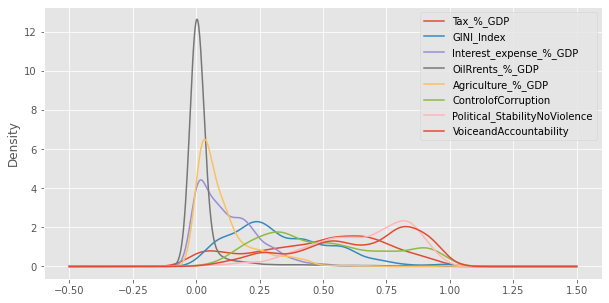

In [22]:
#APLICAÇÃO MINMAXSCALER()
df_dadosNormal = pd.DataFrame(MinMaxScaler().fit_transform(df_dadosAnaTemp), columns = df_dadosAnaTemp.columns,
                              index = df_dadosAnaTemp.index)
df_dadosNormal.plot(kind = 'kde', figsize=(10,5))

In [23]:
df_dadosNormal.to_csv(pastaTrab + '\\07_dadosNormal.csv')